# AI Lab Assignment H4: Neural Networks

In [1]:
!python --version

Python 3.11.0


In [3]:
!pip install matplotlib seaborn scikit-learn tensorflow notebook ipykernel


  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.57.0-cp311-cp311-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
     ---------------------------------------- 12.9/12.9 MB 4.9 MB/s eta 0:00:00
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl (2.7 MB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)
  Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached absl_py-2.2.2-py3-none-a


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tensorflow



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. Data Preprocessing


### ✅ What was done:
- Loaded the MNIST dataset using `tf.keras.datasets.mnist`.
- Normalized pixel values to the [0, 1] range.
- Flattened each 28x28 image into a 784-dimensional vector for the MLP model.

##### Tensorflow.keras.datasets.mnist: Loads the MNIST dataset, which contains 70,000 images of handwritten digits (60k train + 10k test).

##### (X_train, y_train), (X_test, y_test) = mnist.load_data()

    - This loads the dataset into training and testing sets.

    - X_train and X_test contain images shaped (28, 28) per digit.

    - y_train and y_test contain the corresponding digit labels (0 to 9).

##### MNIST pixels range from 0 to 255.

##### Normalizing to [0, 1] improves training efficiency and stability.

##### Flatten 28x28 images into 784-dimensional vectors

- Each 28x28 image becomes a 784-length vector.

- -1 lets NumPy calculate how many samples there are (60,000 and 10,000 respectively).

- 🧠 Why flatten? The assignment specifies a fully connected feedforward neural network, which requires 1D input vectors.

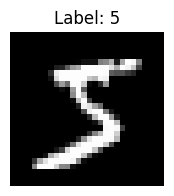

Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Show sample digit
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten 28x28 images into 784-dimensional vectors
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

print(f"Training data shape: {X_train_flat.shape}")
print(f"Test data shape: {X_test_flat.shape}")


# 2. Model Implementation

## A. Scikit-learn version (MLPClassifier)
### ✅ What was done:
- Used `MLPClassifier` from Scikit-learn with one hidden layer of 128 nodes.
- Activation: ReLU | Optimizer: Adam | Batch size: 64 | Iterations: 20
- Captured training loss and test accuracy.
- Evaluated the model using confusion matrix and classification report.

### 📈 Results:
- **Test Accuracy**: **97.37%**
- Training loss decreased consistently across 20 iterations.
- Classification report showed strong performance across all classes.

- Takes flattened images of size 784 (28×28) as input

- Processes them through a hidden layer with 128 neurons

- Outputs predictions for 10 digit classes (0–9)

Iteration 1, loss = 0.30915568
Iteration 2, loss = 0.14120728
Iteration 3, loss = 0.09870359
Iteration 4, loss = 0.07477357
Iteration 5, loss = 0.05923025
Iteration 6, loss = 0.04818828
Iteration 7, loss = 0.03900546
Iteration 8, loss = 0.03117020
Iteration 9, loss = 0.02690932
Iteration 10, loss = 0.02216156
Iteration 11, loss = 0.01969549
Iteration 12, loss = 0.01627620
Iteration 13, loss = 0.01361462
Iteration 14, loss = 0.01278990
Iteration 15, loss = 0.01099030
Iteration 16, loss = 0.01059739
Iteration 17, loss = 0.00737877
Iteration 18, loss = 0.00810545
Iteration 19, loss = 0.00834511
Iteration 20, loss = 0.00688334

✅ Test Accuracy (Scikit-learn MLPClassifier): 97.37%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0

C:\Users\Pop Paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


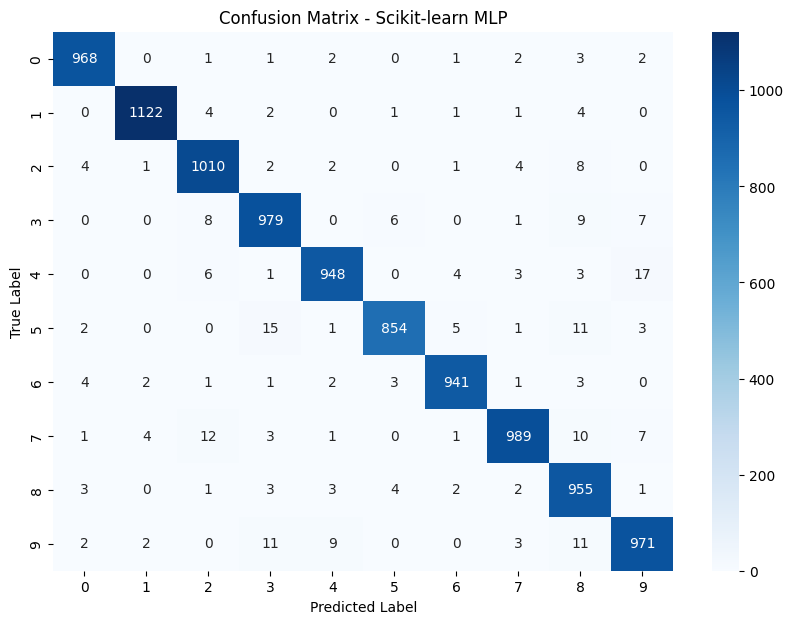

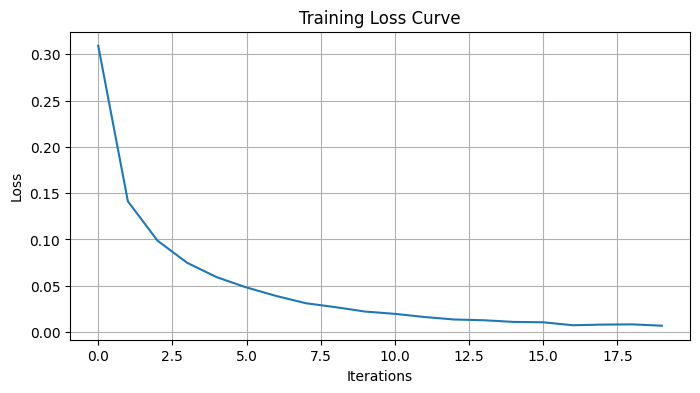

✅ Training Accuracy (Scikit-learn MLPClassifier): 99.63%


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define and train the model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128,),  # One hidden layer with 128 neurons
    activation='relu',
    solver='adam',
    batch_size=64,
    max_iter=20,
    random_state=42,
    verbose=True  # Print training progress
)

mlp_model.fit(X_train_flat, y_train)

# Predict on test data
y_pred = mlp_model.predict(X_test_flat)

# Evaluate model
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Test Accuracy (Scikit-learn MLPClassifier): {test_accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Scikit-learn MLP")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Training loss curve
plt.figure(figsize=(8, 4))
plt.plot(mlp_model.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
# Predict on training data
y_train_pred = mlp_model.predict(X_train_flat)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"✅ Training Accuracy (Scikit-learn MLPClassifier): {train_accuracy * 100:.2f}%")


🔸 hidden_layer_sizes=(128,)
Defines 1 hidden layer with 128 neurons.

Each of the 784 input features (pixels) is connected to each of these 128 neurons (fully connected).

Each neuron computes:

output = activation(∑ 𝑤𝑖*𝑥𝑖 + 𝑏 )

More neurons capture more complex patterns, but can also increase overfitting risk.

🔸 activation='relu'

ReLU (Rectified Linear Unit):

𝑓(𝑥)=max(0,𝑥)

Adds non-linearity to help the network learn more complex representations.

Faster convergence and reduces vanishing gradient issues.

🔸 solver='adam'

Adam = Adaptive Moment Estimation.

A popular optimizer that combines momentum and RMSProp.

Adjusts learning rate for each parameter individually during training.

Benefits:

Works well with sparse gradients.

Requires little tuning.

🔸 batch_size=64

Trains the model using mini-batches of 64 samples at a time.

Why?

Faster and more memory-efficient than full-batch gradient descent.

Introduces some randomness → helps generalize better.

🔸 max_iter=20

Trains for 20 epochs (passes over the full dataset).

Note: If the loss is not converging, it may stop early unless early_stopping=False.

🔸 random_state=42

Makes results reproducible (same weight initialization, shuffling, etc.).

🔸 verbose=True

Prints training progress (loss per iteration).



## B. TensorFlow version

### ✅ What was done:
- Created a sequential model using TensorFlow with one hidden Dense layer (128 nodes).
- Used ReLU activation and softmax output.
- Trained using a validation split of 0.2 and learning rate of 0.001.
- Monitored accuracy and loss for both training and validation sets.

### 📈 Results:
- **Test Accuracy**: **97.71%**
- Validation accuracy consistently improved, peaking around epoch 13–15.
- Final confusion matrix and classification report showed high performance.

Your flattened image vector X_train_flat (shape (60000, 784)) is passed to the network.

The hidden layer (Dense(128)) transforms this 784-D input into a new 128-D space using learned weights and the ReLU function.

The output layer (Dense(10)) converts those 128 features into 10 class probabilities.



C:\Users\Pop Paul\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 - 7s - 9ms/step - accuracy: 0.9087 - loss: 0.3298 - val_accuracy: 0.9527 - val_loss: 0.1788
Epoch 2/20
750/750 - 4s - 5ms/step - accuracy: 0.9554 - loss: 0.1544 - val_accuracy: 0.9625 - val_loss: 0.1331
Epoch 3/20
750/750 - 3s - 5ms/step - accuracy: 0.9680 - loss: 0.1081 - val_accuracy: 0.9661 - val_loss: 0.1121
Epoch 4/20
750/750 - 3s - 4ms/step - accuracy: 0.9758 - loss: 0.0824 - val_accuracy: 0.9709 - val_loss: 0.0991
Epoch 5/20
750/750 - 3s - 4ms/step - accuracy: 0.9818 - loss: 0.0639 - val_accuracy: 0.9705 - val_loss: 0.1058
Epoch 6/20
750/750 - 3s - 4ms/step - accuracy: 0.9854 - loss: 0.0513 - val_accuracy: 0.9728 - val_loss: 0.0916
Epoch 7/20
750/750 - 3s - 4ms/step - accuracy: 0.9879 - loss: 0.0422 - val_accuracy: 0.9730 - val_loss: 0.0882
Epoch 8/20
750/750 - 3s - 4ms/step - accuracy: 0.9904 - loss: 0.0334 - val_accuracy: 0.9704 - val_loss: 0.1062
Epoch 9/20
750/750 - 3s - 5ms/step - accuracy: 0.9925 - loss: 0.0274 - val_accuracy: 0.9766 - val_loss: 0.0844
E

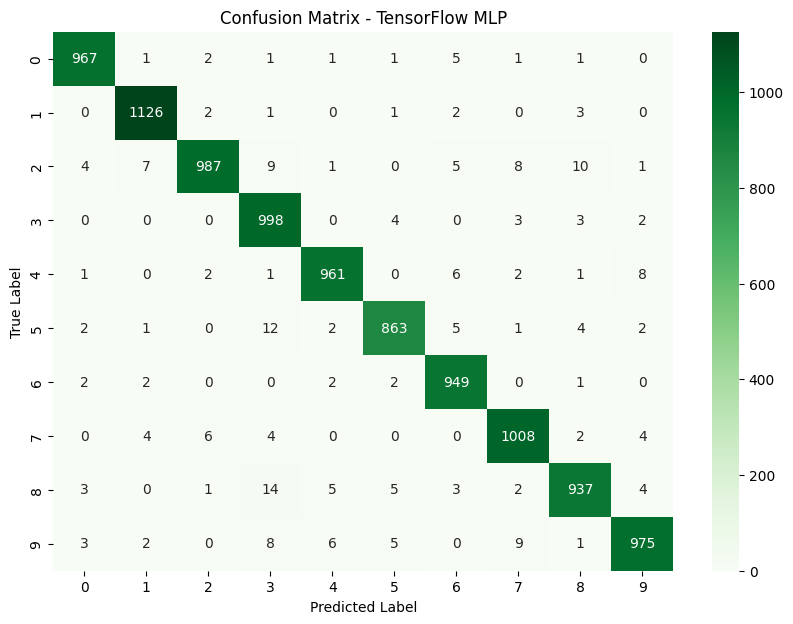

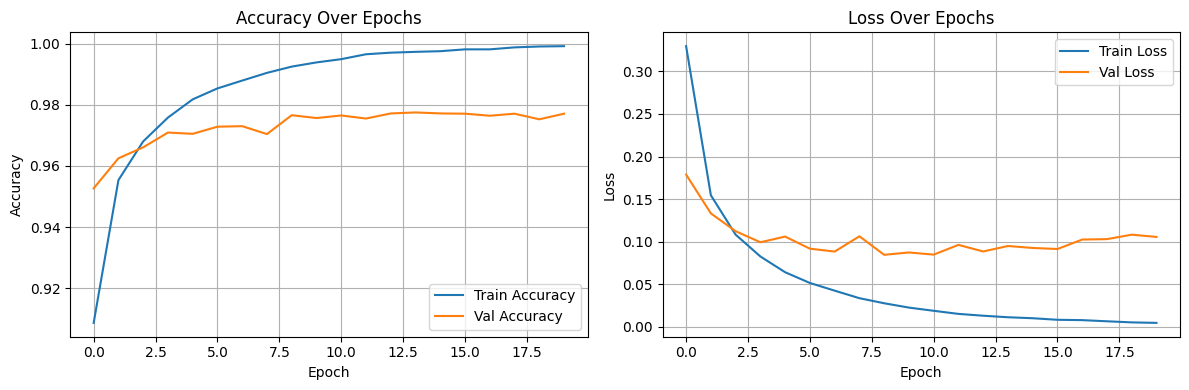

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define the model
tf_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile the model
tf_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with validation split
history = tf_model.fit(
    X_train_flat, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

# Evaluate on test set
test_loss, test_accuracy = tf_model.evaluate(X_test_flat, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy (TensorFlow): {test_accuracy * 100:.2f}%")

# Predict classes
y_pred_tf = tf_model.predict(X_test_flat)
y_pred_classes = np.argmax(y_pred_tf, axis=1)

# Classification report
print("\nClassification Report (TensorFlow):")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
conf_matrix_tf = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - TensorFlow MLP")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Step 3: Performance Comparison and Final Comments

### 🔍 Accuracy Comparison

| Metric                | Scikit-learn MLP | TensorFlow MLP |
|----------------------|------------------|----------------|
| **Test Accuracy**     | 97.37%           | **97.71%**      |
| **Training Accuracy** | 99.63%           | **99.92%**      |
| **Validation Accuracy** | N/A             | **97.71%**      |

Both models achieved **very high performance**, comfortably exceeding the 96% threshold. TensorFlow's model slightly outperformed Scikit-learn by approximately **0.34%** in test accuracy.

---

### 📊 Loss & Accuracy Trends

- **Scikit-learn MLP**:
  - Training loss dropped quickly from **0.31 to 0.0068** over 20 iterations.
  - No explicit validation loss/accuracy tracking during training (limitation of `MLPClassifier`).
  
- **TensorFlow MLP**:
  - Clear **training and validation curves** show smooth convergence.
  - Training accuracy reached **99.92%**, with validation accuracy peaking at **97.75%**.
  - Validation loss began to plateau around epoch 10, suggesting good generalization and no major overfitting.

---

### 📉 Confusion Matrix Insights

- Both models produced strong diagonal matrices, indicating correct classifications.
- Misclassifications were minimal and mostly occurred between visually similar digits (e.g., 3 vs 5, 4 vs 9).
- TensorFlow’s confusion matrix showed slightly fewer off-diagonal errors, supporting its higher accuracy.

---

### 🧠 Implementation Comparison

| Aspect                  | Scikit-learn (`MLPClassifier`) | TensorFlow (Sequential API)     |
|-------------------------|-------------------------------|----------------------------------|
| Code Simplicity         | Very easy, one-liner setup     | More flexible, but requires more setup |
| Customizability         | Limited                        | Highly customizable              |
| Training Control        | Basic (limited epoch insight)  | Full control (metrics, callbacks) |
| Visualization Options   | Manual                         | Built-in logging and plots       |
| Performance             | Excellent                      | Slightly better                  |

Scikit-learn is ideal for quick experimentation, while TensorFlow offers greater control for advanced modeling and tuning.

---
### ❓ Which one is easier to implement?
✅ Scikit-learn’s MLPClassifier is easier to implement.
It requires minimal code and setup — often just one line to define and train the model. It's perfect for beginners or for quick prototyping. However, it offers limited insight into the training process and less control over model architecture and training behavior.

### 🚀 Which gives better performance? Why?
✅ TensorFlow’s Sequential model gives slightly better performance.
It achieved a higher test accuracy (97.71%) compared to Scikit-learn's 97.37%, and also had:

Better training accuracy (99.92%)

Validation tracking to detect overfitting

Fewer errors in the confusion matrix

Why?

More control over learning rate, optimizer, and architecture

Clear training & validation curves enabled better tuning

Deeper customization helps in achieving higher generalization

So, Scikit-learn is easier, but TensorFlow performs better — especially in projects that benefit from tuning, visualization, and detailed training control.

### ✅ Conclusion

Both models performed **exceptionally well**. The TensorFlow MLP slightly outperformed the Scikit-learn version in both accuracy and flexibility, making it a better choice for scenarios requiring deep customization and advanced tuning. However, Scikit-learn remains a highly efficient tool for rapid development and prototyping with strong baseline performance.
